In [1]:
from tensorflow.keras.models import Sequential 

In [13]:
import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

input_dim = 784  # 28*28
output_dim = nb_classes = 10 # 10 classes
batch_size = 128
nb_epoch = 20

X_train = X_train.reshape(60000, input_dim)
X_test = X_test.reshape(10000, input_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [14]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

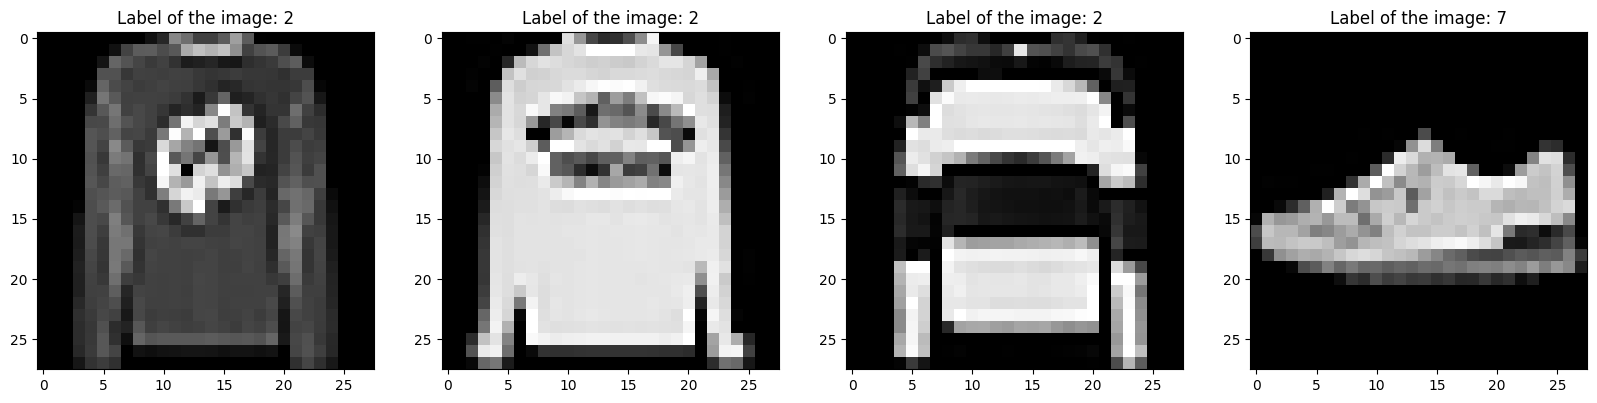

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))

plt.subplot(141)
plt.imshow(X_train[123].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[123]))

plt.subplot(142)
plt.imshow(X_train[124].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[124]))

plt.subplot(143)
plt.imshow(X_train[125].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[125]))

plt.subplot(144)
plt.imshow(X_train[126].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[126]))

plt.show()

* Preprocess your data so that you can feed it into ANN models.

* Split your data into training and test sets.

* Try different ANN models and train them on your training set. You can play with the following:

* Number of layers
* Activation functions of the layers
* Number of neurons in the layers
* Different batch sizes during training
* Compare your models' training scores and interpret your results.

* Evaluate how your models perform on your test set. Compare the results of your models.

In [20]:
# define model 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras import losses
def build_model(activation_function,layers):
  model = Sequential()
  # The first dense layer
  model.add(Dense(2**(layers+4), input_shape=(784,), activation=activation_function))
  for layer in range(layers-1,1,-1):
    # The second dense layer
    model.add(Dense(2**(layer+4), activation=activation_function))
  # The last layer is the output layer
  model.add(Dense(10, activation='softmax'))
  model.summary()
  return model
def train_me(model,loss_function,batch_size):
  model.compile(optimizer='sgd', loss=loss_function,
              metrics=['accuracy'])
  # Setting `verbose=1` prints out some results after each epoch
  print("Learning rate before first fit:", model.optimizer.learning_rate.numpy())
  model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)
def print_scores(model):
  score = model.evaluate(X_test, Y_test, verbose=0)
  print('Test score:', score[0])
  print('Test accuracy:', score[1])

In [24]:
#* Number of layers  3, 5 ,7 run and see model performance
for layers in (3,5,7):
 model = build_model(activation_function='relu',layers=layers)    
 train_me(model,losses.categorical_crossentropy,batch_size)
 print_scores(model)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Learning rate before first fit: 0.01
Epoch 1/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 8s 400us/step - accuracy: 0.7682 - loss: 0.6569
Epoch 2/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 8s 397us/step - accuracy: 0.8572 - loss: 0.3934
Epoch 3/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 8s 395us/step - accuracy: 0.8694 - loss: 0.3545
Epoch 4/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 8s 417us/step - accuracy: 0.8799 - loss: 0.3209
Epoch 5/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 9s 434us/step - accuracy: 0.8855 - loss: 0.3048
Epoch 6/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 8s 396us/step - accuracy: 0.8909 - loss: 0.2917
Epoch 7/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 8s 396us/step - accuracy: 0.8937 - loss: 0.2806
Epoch 8/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 8s 396us/step - accuracy: 0.9005 - loss: 0.2599
Epoch 9/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 8s 395us/step - accuracy: 0.9022 - loss: 0.2601
Epoch 10/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 8s 395us/step - accuracy: 0.9070 - loss: 0.2486
Epoch 11/20
20000/20000 ━━━━━━━━━━━━━━━━━━

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 575,050 (2.19 MB)

 Trainable params: 575,050 (2.19 MB)

 Non-trainable params: 0 (0.00 B)

Learning rate before first fit: 0.01
Epoch 1/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 19s 942us/step - accuracy: 0.7578 - loss: 0.6606
Epoch 2/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 17s 870us/step - accuracy: 0.8561 - loss: 0.3872
Epoch 3/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 17s 873us/step - accuracy: 0.8713 - loss: 0.3446
Epoch 4/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 17s 873us/step - accuracy: 0.8816 - loss: 0.3130
Epoch 5/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 19s 939us/step - accuracy: 0.8871 - loss: 0.2983
Epoch 6/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 18s 878us/step - accuracy: 0.8958 - loss: 0.2752
Epoch 7/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 18s 877us/step - accuracy: 0.8998 - loss: 0.2648
Epoch 8/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 18s 915us/step - accuracy: 0.9036 - loss: 0.2547
Epoch 9/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 18s 910us/step - accuracy: 0.9074 - loss: 0.2423
Epoch 10/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 18s 882us/step - accuracy: 0.9108 - loss: 0.2314
Epoch 11/20
20000/20000 ━━━━━━━━

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_38 (Dense)                │ (None, 2048)           │     1,607,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,403,786 (16.80 MB)

 Trainable params: 4,403,786 (16.80 MB)

 Non-trainable params: 0 (0.00 B)

Learning rate before first fit: 0.01
Epoch 1/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 79s 4ms/step - accuracy: 0.7608 - loss: 0.6658
Epoch 2/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 77s 4ms/step - accuracy: 0.8562 - loss: 0.3848
Epoch 3/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 77s 4ms/step - accuracy: 0.8753 - loss: 0.3374
Epoch 4/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 75s 4ms/step - accuracy: 0.8862 - loss: 0.3045
Epoch 5/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 76s 4ms/step - accuracy: 0.8912 - loss: 0.2889
Epoch 6/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 77s 4ms/step - accuracy: 0.8979 - loss: 0.2678
Epoch 7/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 77s 4ms/step - accuracy: 0.9043 - loss: 0.2538
Epoch 8/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 77s 4ms/step - accuracy: 0.9075 - loss: 0.2454
Epoch 9/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 76s 4ms/step - accuracy: 0.9122 - loss: 0.2342
Epoch 10/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 75s 4ms/step - accuracy: 0.9186 - loss: 0.2201
Epoch 11/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 77s 4ms

with 3 layer: \
Test score: 0.34997686743736267 \
Test accuracy: 0.8852999806404114 \
with 5 layer: \
Test score: 0.33286550641059875 \
Test accuracy: 0.8945000171661377 \
with 7 layer: \
Test score: 0.36262401938438416
Test accuracy: 0.8862000107765198

Model accuracy increasing as the layers increase but it is nt significant compared to the complexity of running th emodel. So selecting the 3 layer ANN


In [27]:
#* Activation functions of the layers
for activation_function in ('tanh','sigmoid','relu'):
    print("model running with "+activation_function)
    model = build_model(activation_function,layers=3)
    train_me(model,losses.categorical_crossentropy,batch_size)
    print_scores(model)

model running with tanh


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Learning rate before first fit: 0.01
Epoch 1/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 8s 397us/step - accuracy: 0.7858 - loss: 0.5948
Epoch 2/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 8s 379us/step - accuracy: 0.8572 - loss: 0.3913
Epoch 3/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 8s 386us/step - accuracy: 0.8718 - loss: 0.3515
Epoch 4/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 8s 399us/step - accuracy: 0.8791 - loss: 0.3260
Epoch 5/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 8s 384us/step - accuracy: 0.8843 - loss: 0.3114
Epoch 6/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 8s 381us/step - accuracy: 0.8928 - loss: 0.2875
Epoch 7/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 8s 396us/step - accuracy: 0.8979 - loss: 0.2791
Epoch 8/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 8s 412us/step - accuracy: 0.9015 - loss: 0.2644
Epoch 9/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 8s 385us/step - accuracy: 0.9025 - loss: 0.2588
Epoch 10/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 8s 386us/step - accuracy: 0.9081 - loss: 0.2462
Epoch 11/20
20000/20000 ━━━━━━━━━━━━━━━━━━

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_51 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Learning rate before first fit: 0.01
Epoch 1/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 8s 382us/step - accuracy: 0.5584 - loss: 1.3181
Epoch 2/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 8s 385us/step - accuracy: 0.8053 - loss: 0.5353
Epoch 3/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 8s 418us/step - accuracy: 0.8360 - loss: 0.4592
Epoch 4/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 8s 384us/step - accuracy: 0.8477 - loss: 0.4224
Epoch 5/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 9s 431us/step - accuracy: 0.8551 - loss: 0.4043
Epoch 6/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 8s 390us/step - accuracy: 0.8604 - loss: 0.3874
Epoch 7/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 8s 387us/step - accuracy: 0.8645 - loss: 0.3727
Epoch 8/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 8s 391us/step - accuracy: 0.8701 - loss: 0.3590
Epoch 9/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 8s 383us/step - accuracy: 0.8749 - loss: 0.3444
Epoch 10/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 8s 386us/step - accuracy: 0.8754 - loss: 0.3419
Epoch 11/20
20000/20000 ━━━━━━━━━━━━━━━━━━

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_54 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Learning rate before first fit: 0.01
Epoch 1/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 8s 388us/step - accuracy: 0.7671 - loss: 0.6523
Epoch 2/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 9s 431us/step - accuracy: 0.8549 - loss: 0.3920
Epoch 3/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 8s 407us/step - accuracy: 0.8720 - loss: 0.3502
Epoch 4/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 8s 385us/step - accuracy: 0.8758 - loss: 0.3295
Epoch 5/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 8s 389us/step - accuracy: 0.8840 - loss: 0.3082
Epoch 6/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 8s 389us/step - accuracy: 0.8908 - loss: 0.2883
Epoch 7/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 8s 386us/step - accuracy: 0.8950 - loss: 0.2833
Epoch 8/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 8s 386us/step - accuracy: 0.8996 - loss: 0.2676
Epoch 9/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 8s 391us/step - accuracy: 0.9024 - loss: 0.2583
Epoch 10/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 8s 386us/step - accuracy: 0.9042 - loss: 0.2512
Epoch 11/20
20000/20000 ━━━━━━━━━━━━━━━━━━

with activation function tanh: \
Test score: 0.352226197719574 \
Test accuracy: 0.883899986743927 \
with activation function sigmoid: \
Test score: 0.3492231070995331 \
Test accuracy: 0.8741000294685364\
with activation function relu: \
Test score: 0.34944647550582886 \
Test accuracy: 0.8816999793052673 \
ANN with activation function tanh performs better than other ANN models, so selection tanh activation function.

In [31]:
def build_model_nn(activation_function,layers,nn):
  model = Sequential()
  # The first dense layer
  model.add(Dense(nn[0], input_shape=(784,), activation=activation_function))
  # The second dense layer
  model.add(Dense(nn[1], activation=activation_function))
  # The last layer is the output layer
  model.add(Dense(10, activation='softmax'))
  model.summary()
  return model

In [34]:
#* Number of neurons in the layers
for nn in ((64,32),(128,64),(256,128)):
    model = build_model_nn(activation_function='tanh',layers=3,nn=nn)
    train_me(model,losses.categorical_crossentropy,batch_size)
    print_scores(model)

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_57 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,650 (205.66 KB)

 Trainable params: 52,650 (205.66 KB)

 Non-trainable params: 0 (0.00 B)

Learning rate before first fit: 0.01
Epoch 1/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 6s 306us/step - accuracy: 0.7786 - loss: 0.6348
Epoch 2/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 6s 303us/step - accuracy: 0.8571 - loss: 0.3961
Epoch 3/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 6s 306us/step - accuracy: 0.8704 - loss: 0.3553
Epoch 4/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 6s 311us/step - accuracy: 0.8766 - loss: 0.3379
Epoch 5/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 7s 330us/step - accuracy: 0.8844 - loss: 0.3184
Epoch 6/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 7s 328us/step - accuracy: 0.8881 - loss: 0.3073
Epoch 7/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 6s 306us/step - accuracy: 0.8922 - loss: 0.2941
Epoch 8/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 6s 313us/step - accuracy: 0.8955 - loss: 0.2840
Epoch 9/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 6s 305us/step - accuracy: 0.8973 - loss: 0.2749
Epoch 10/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 6s 304us/step - accuracy: 0.8985 - loss: 0.2716
Epoch 11/20
20000/20000 ━━━━━━━━━━━━━━━━━━

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_60 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Learning rate before first fit: 0.01
Epoch 1/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 8s 396us/step - accuracy: 0.7845 - loss: 0.6073
Epoch 2/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 8s 380us/step - accuracy: 0.8543 - loss: 0.3977
Epoch 3/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 8s 383us/step - accuracy: 0.8712 - loss: 0.3529
Epoch 4/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 8s 380us/step - accuracy: 0.8787 - loss: 0.3298
Epoch 5/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 8s 384us/step - accuracy: 0.8883 - loss: 0.3012
Epoch 6/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 9s 436us/step - accuracy: 0.8917 - loss: 0.2922
Epoch 7/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 8s 389us/step - accuracy: 0.8975 - loss: 0.2768
Epoch 8/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 8s 385us/step - accuracy: 0.8998 - loss: 0.2674
Epoch 9/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 8s 386us/step - accuracy: 0.9026 - loss: 0.2616
Epoch 10/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 8s 382us/step - accuracy: 0.9086 - loss: 0.2482
Epoch 11/20
20000/20000 ━━━━━━━━━━━━━━━━━━

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_63 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

Learning rate before first fit: 0.01
Epoch 1/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 10s 519us/step - accuracy: 0.7836 - loss: 0.5950
Epoch 2/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 11s 537us/step - accuracy: 0.8564 - loss: 0.3905
Epoch 3/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 11s 555us/step - accuracy: 0.8726 - loss: 0.3463
Epoch 4/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 11s 533us/step - accuracy: 0.8815 - loss: 0.3223
Epoch 5/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 10s 523us/step - accuracy: 0.8867 - loss: 0.3066
Epoch 6/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 10s 524us/step - accuracy: 0.8919 - loss: 0.2866
Epoch 7/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 10s 524us/step - accuracy: 0.8952 - loss: 0.2751
Epoch 8/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 10s 517us/step - accuracy: 0.8985 - loss: 0.2706
Epoch 9/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 11s 570us/step - accuracy: 0.9034 - loss: 0.2554
Epoch 10/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 11s 534us/step - accuracy: 0.9074 - loss: 0.2447
Epoch 11/20
20000/20000 ━━━━━━━━

with Number of nurons 64,32,10: \
Test score: 0.3642078936100006 \
Test accuracy: 0.8779000043869019 \
with Number of nurons 128,64,10: \
Test score: 0.3572620451450348 \
Test accuracy: 0.8810999989509583\
with Number of nurons 256,128,10: \
Test score: 0.3374260663986206 \
Test accuracy: 0.8853999972343445\
Model performance is increasing as the number of nurons increases, also training time increases with it. For balance I am picking nurons 128,64,10 for the model.

In [40]:
#* Different batch sizes during training
for batch_size in (16,128,1024):
    model = build_model(activation_function='tanh',layers=3)
    train_me(model,losses.categorical_crossentropy,batch_size)
    print_scores(model)

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_87 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_89 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Learning rate before first fit: 0.01
Epoch 1/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 2s 447us/step - accuracy: 0.7362 - loss: 0.7999
Epoch 2/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 2s 434us/step - accuracy: 0.8419 - loss: 0.4410
Epoch 3/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 2s 430us/step - accuracy: 0.8541 - loss: 0.4001
Epoch 4/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 2s 432us/step - accuracy: 0.8624 - loss: 0.3815
Epoch 5/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 2s 431us/step - accuracy: 0.8698 - loss: 0.3598
Epoch 6/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 2s 438us/step - accuracy: 0.8733 - loss: 0.3541
Epoch 7/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 2s 437us/step - accuracy: 0.8769 - loss: 0.3384
Epoch 8/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 2s 455us/step - accuracy: 0.8803 - loss: 0.3310
Epoch 9/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 2s 427us/step - accuracy: 0.8865 - loss: 0.3160
Epoch 10/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 2s 426us/step - accuracy: 0.8889 - loss: 0.3109
Epoch 11/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 2s 428us/step - acc

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_90 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_91 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_92 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Learning rate before first fit: 0.01
Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - accuracy: 0.5850 - loss: 1.3443
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - accuracy: 0.7774 - loss: 0.6784
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - accuracy: 0.8019 - loss: 0.5825
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - accuracy: 0.8136 - loss: 0.5392
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - accuracy: 0.8261 - loss: 0.4996
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - accuracy: 0.8322 - loss: 0.4786
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - accuracy: 0.8360 - loss: 0.4646
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step - accuracy: 0.8447 - loss: 0.4472
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - accuracy: 0.8444 - loss: 0.4398
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - accuracy: 0.8494 - loss: 0.4303
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - accuracy: 0.8491 - loss: 

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_93 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_94 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_95 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Learning rate before first fit: 0.01
Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2997 - loss: 2.0334
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6368 - loss: 1.2789
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6707 - loss: 1.0629
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6957 - loss: 0.9490
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7173 - loss: 0.8776
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7324 - loss: 0.8279
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7490 - loss: 0.7811
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7576 - loss: 0.7534
Epoch 9/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7656 - loss: 0.7301
Epoch 10/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7756 - loss: 0.6998
Epoch 11/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7789 - loss: 0.6874
Epoch 12/20
59/59 ━━━━━━━━━━━━━━━━━━━

with batch size 16: \
Test score: 0.329838365316391 \
Test accuracy: 0.8828999996185303 \
with batch size 128: \
Test score: 0.4133579134941101 \
Test accuracy: 0.8496000170707703 \
with batch size 1024: \
Test score: 0.5781933069229126 \
Test accuracy: 0.8040000200271606 \
Smaller the batch size the performance is better, but based on complexity, I select 128 as batch size. 

## Over all model I select with below params: 
* activation_function as tanh
* batch_size 128
* Layers 3
* nurons 128,64,10